In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Recommendation Data/19_March_Own_Cluster_Demographic_Data_APPROACH-3/All Data Create/df_data/df_temp_cluster_Own_Loan_Amount_Condition.csv")

In [ ]:
df.head()

,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName,Applicant Age,summary_income,summary_income_cv,city,state,Country,userId,loanId,count,Cluster_result
0,0062x000002aHhMAAU,0010K00001cOB9dQAG,4,3,Elec / Gas / Water,6,150,6.571,Weekly,Loan Paid,25,1300.00,2563.49,Mount Crosby,QLD,Australia,432,82379,1,1
1,0062x00000AlkKWAAZ,0010K00001cPxiTQAS,3,3,Other,3,100,6.143,Fortnightly,Loan Paid,39,2708.33,2358.55,NOBLE PARK,VIC,Australia,500,260284,1,1
2,0062x00000AKiaQAAT,0010K00001cwvXbQAI,3,3,Living Expenses,6,100,10.714,Fortnightly,Loan Paid,54,1733.33,3217.52,Reservoir,VIC,Australia,661,226878,1,1
3,0062x00000CSVNwAAP,0010K00001dQ8y3QAC,4,4,Living Expenses,5,100,10.571,Fortnightly,Loan Paid,28,1733.33,2801.36,Albion,QLD,Australia,844,313319,1,1
4,0062x000009p7lfAAA,0010K00001dpdrcQAA,6,5,Living Expenses,6,100,6.286,Weekly,Loan Paid,25,2383.33,4935.31,Eagleby,QLD,Australia,1040,205917,1,1


<Axes: >

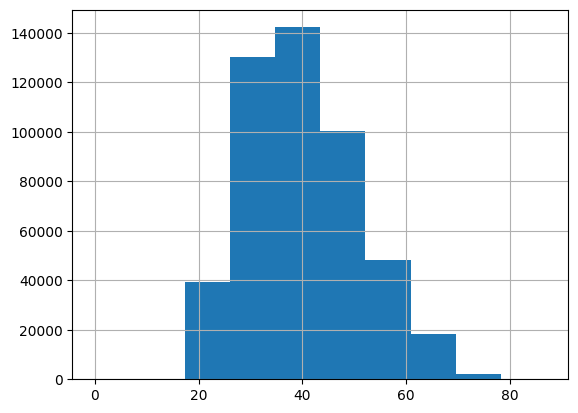

In [ ]:
df['Applicant Age'].hist()

<Axes: >

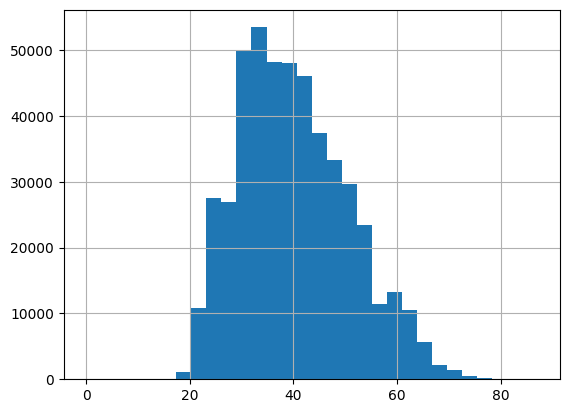

In [ ]:
df['Applicant Age'].hist(bins=30)

From the histogram of the "Applicant Age" column, we can infer the following:

1. **Distribution:** The distribution of applicant ages appears to be unimodal, with a peak around the 30-35 age range. This suggests that the majority of loan applicants in this dataset fall within this age group.
2. **Skewness:** The distribution is slightly skewed to the right, indicating that there are a few older applicants compared to younger applicants.
3. **Outliers:** There are a few outliers present in the data, representing applicants with ages above 60 or below 20. These outliers should be investigated further to understand their impact on the analysis.
4. **Data Range:** The histogram shows that the applicant ages range from approximately 20 to 70 years old.

Additional insights might be gained by:

* Calculating summary statistics such as mean, median, standard deviation, and quartiles to better understand the central tendency and spread of the data.
* Comparing the age distribution to other relevant variables, such as loan amount, income, or credit score, to identify any potential relationships.
* Investigating the outliers to understand their characteristics and potential impact on the analysis.

<Axes: >

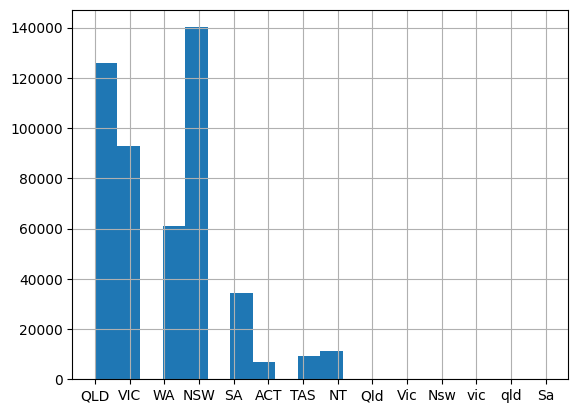

In [ ]:
df['state'].hist(bins=20)

In [ ]:
df['state'] = df['state'].replace(to_replace="Qld", value="QLD")
df['state'] = df['state'].replace(to_replace="Vic", value="VIC")
df['state'] = df['state'].replace(to_replace="VIc", value="VIC")
df['state'] = df['state'].replace(to_replace="Nsw", value="NSW")
df['state'] = df['state'].replace(to_replace="vic", value="VIC")
df['state'] = df['state'].replace(to_replace="qld", value="QLD")
df['state'] = df['state'].replace(to_replace="Sa", value="SA")

<Axes: >

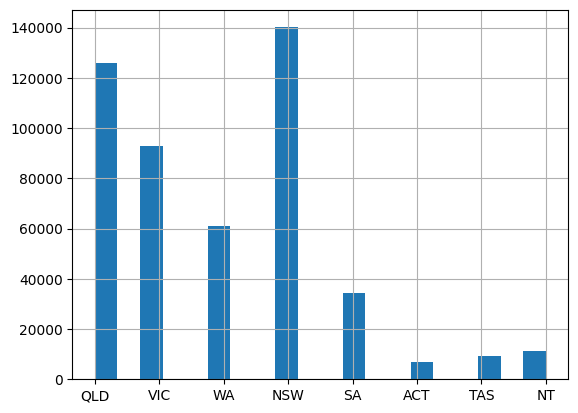

In [ ]:
df['state'].hist(bins=20)

From the histogram of the "state" column, we can infer the following:

1. **Distribution:** The distribution of states is highly skewed, with a few states having a significantly higher number of applicants compared to others.
2. **Most Common States:** The histogram suggests that the states with the highest number of applicants are likely to be QLD, VIC, WA, NSW.
3. **Less Common States:** There are a number of states with relatively few applicants, such as NT,TAS,ACT,SA.
4. **Geographical Spread:** The histogram indicates that the applicants are spread across a wide range of states, suggesting a diverse geographical distribution.

Additional insights might be gained by:

* Identifying the top 5 or 10 states with the highest number of applicants and investigating their characteristics to understand why they might be overrepresented.

In [ ]:
df["Applicant Income"]  = df['summary_income'] + df['summary_income_cv']

In [ ]:
df[['Applicant Income','summary_income', 'Applicant Income']].describe()

,Applicant Income,summary_income,Applicant Income
count,4.810710e+05,4.810710e+05,4.810710e+05
mean,1.179351e+04,5.685433e+03,1.179351e+04
std,2.534099e+05,2.528465e+05,2.534099e+05
min,-7.695000e+02,0.000000e+00,-7.695000e+02
25%,5.609635e+03,1.222000e+03,5.609635e+03
50%,8.096880e+03,3.172000e+03,8.096880e+03
75%,1.125012e+04,4.333330e+03,1.125012e+04
max,8.714361e+07,8.714009e+07,8.714361e+07


There are several techniques that can be used to create user groups from the dataframe `df`:

1. **Clustering:**
   - Use unsupervised machine learning algorithms like K-means or hierarchical clustering to group users based on their similarities in terms of various features.
   - This can be useful for identifying distinct segments of users with similar characteristics or behaviors.

2. **Segmentation:**
   - Use rule-based segmentation to group users based on specific criteria or rules.
   - For example, you could create groups based on age, income, location, or loan amount.

3. **Demographic Analysis:**
   - Analyze the demographic data available in the dataframe to identify common patterns or trends.
   - This can be useful for understanding the overall characteristics of the user population and identifying potential target groups.

4. **Behavioral Analysis:**
   - Analyze the behavioral data available in the dataframe to identify user behaviors, preferences, or patterns.
   - This can be useful for understanding how users interact with the product or service and identifying opportunities for improvement.

5. **Hybrid Approach:**
   - Combine multiple techniques to create user groups that are both meaningful and actionable.
   - For example, you could use clustering to identify initial groups and then refine them using rule-based segmentation or demographic analysis.

The choice of technique will depend on the specific goals of the analysis and the nature of the data available in the dataframe.

Here's an example of using K-means clustering to create user groups:


The feature names from the dataframe `df` that could be used for clustering are:

* `Applicant Age`
* `Coapplicant Income`
* `Loan Amount`
* `Loan_Amount_Term`
* `Credit_History`
* `Gender_Male`
* `Married_Yes`
* `Dependents_3+`
* `Education_Not Graduate`
* `Self_Employed_Yes`
* `Property_Area_Urban`
* `Property_Area_Semiurban`
* `Applicant Income`

These features represent various demographic, financial, and behavioral characteristics of the loan applicants. By using these features, clustering algorithms can group applicants with similar characteristics together, allowing for the identification of distinct user segments.

It's important to note that the choice of features for clustering will depend on the specific goals of the analysis and the nature of the data available. Other features from the dataframe could also be considered for clustering, depending on the specific context and requirements.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['state'] = le.fit_transform(df['state'])

Why to use Normalization
- Scale Sensitivity: KMeans clustering is sensitive to the scale of the variables. If the features have different scales, the clustering algorithm may be biased towards variables with larger scales. Normalization ensures that each feature contributes equally to the distance calculations.

- Distance Metric: KMeans clustering uses Euclidean distance by default to measure the distance between data points and cluster centroids.

In [ ]:
features = ['Applicant Age', 'Applicant Income', 'state']

# Normalize the data
df[features] = (df[features] - df[features].min()) / (df[features].max() - df[features].min())

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Perform K-means clustering
n_clusters = 3000
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df[features])

# Assign cluster labels to the data points
df['Cluster'] = kmeans.labels_

# Analyze the clusters
df.groupby('Cluster')[features].describe()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Applicant Age                                                        \
                count      mean           std       min       25%       50%   
Cluster                                                                       
0                51.0  0.229885  0.000000e+00  0.229885  0.229885  0.229885   
1               903.0  0.413793  5.554191e-17  0.413793  0.413793  0.413793   
2               627.0  0.471264  0.000000e+00  0.471264  0.471264  0.471264   
3               647.0  0.563218  1.111082e-16  0.563218  0.563218  0.563218   
4               241.0  0.655172  1.112534e-16  0.655172  0.655172  0.655172   
...               ...       ...           ...       ...       ...       ...   
2995            242.0  0.540230  1.112524e-16  0.540230  0.540230  0.540230   
2996             75.0  0.574713  1.117699e-16  0.574713  0.574713  0.574713   
2997             23.0  0.321839  0.000000e+00  0.321839  0.321839  0.321839   
2998              1.0  0.678161           NaN  0.678161  0.678161  0.678161   
2999            628.0  0.494253  1.111108e-16  0.494253  0.494253  0.494253   

                            Applicant Income            ...            \
              75%       max            count      mean  ...       75%   
Cluster                                                 ...             
0        0.229885  0.229885             51.0  0.000131  ...  0.000152   
1        0.413793  0.413793            903.0  0.000093  ...  0.000100   
2        0.471264  0.471264            627.0  0.000051  ...  0.000057   
3        0.563218  0.563218            647.0  0.000088  ...  0.000094   
4        0.655172  0.655172            241.0  0.000086  ...  0.000093   
...           ...       ...              ...       ...  ...       ...   
2995     0.540230  0.540230            242.0  0.000189  ...  0.000198   
2996     0.574713  0.574713             75.0  0.000013  ...  0.000009   
2997     0.321839  0.321839             23.0  0.000310  ...  0.000326   
2998     0.678161  0.678161              1.0  0.000586  ...  0.000586   
2999     0.494253  0.494253            628.0  0.000110  ...  0.000114   

                   state                                              \
              max  count      mean           std       min       25%   
Cluster                                                                
0        0.000227   51.0  0.142857  0.000000e+00  0.142857  0.142857   
1        0.000107  903.0  0.857143  0.000000e+00  0.857143  0.857143   
2        0.000063  627.0  0.428571  5.555547e-17  0.428571  0.428571   
3        0.000101  647.0  0.142857  5.555410e-17  0.142857  0.142857   
4        0.000104  241.0  0.857143  1.112534e-16  0.857143  0.857143   
...           ...    ...       ...           ...       ...       ...   
2995     0.000206  242.0  0.142857  2.781310e-17  0.142857  0.142857   
2996     0.000029   75.0  0.428571  1.117699e-16  0.428571  0.428571   
2997     0.000352   23.0  0.428571  5.675875e-17  0.428571  0.428571   
2998     0.000586    1.0  0.571429           NaN  0.571429  0.571429   
2999     0.000118  628.0  0.142857  5.555540e-17  0.142857  0.142857   

                                       
              50%       75%       max  
Cluster                                
0        0.142857  0.142857  0.142857  
1        0.857143  0.857143  0.857143  
2        0.428571  0.428571  0.428571  
3        0.142857  0.142857  0.142857  
4        0.857143  0.857143  0.857143  
...           ...       ...       ...  
2995     0.142857  0.142857  0.142857  
2996     0.428571  0.428571  0.428571  
2997     0.428571  0.428571  0.428571  
2998     0.571429  0.571429  0.571429  
2999     0.142857  0.142857  0.142857  

[3000 rows x 24 columns]

In [ ]:
df.head(20)

,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName,...,summary_income_cv,city,state,Country,userId,loanId,count,Cluster_result,Applicant Income,Cluster
0,0062x000002aHhMAAU,0010K00001cOB9dQAG,4,3,Elec / Gas / Water,6,150,6.571,Weekly,Loan Paid,...,2563.49,Mount Crosby,0.428571,Australia,432,82379,1,1,0.000053,1997
1,0062x00000AlkKWAAZ,0010K00001cPxiTQAS,3,3,Other,3,100,6.143,Fortnightly,Loan Paid,...,2358.55,NOBLE PARK,0.857143,Australia,500,260284,1,1,0.000067,1722
2,0062x00000AKiaQAAT,0010K00001cwvXbQAI,3,3,Living Expenses,6,100,10.714,Fortnightly,Loan Paid,...,3217.52,Reservoir,0.857143,Australia,661,226878,1,1,0.000066,961
3,0062x00000CSVNwAAP,0010K00001dQ8y3QAC,4,4,Living Expenses,5,100,10.571,Fortnightly,Loan Paid,...,2801.36,Albion,0.428571,Australia,844,313319,1,1,0.000061,2481
4,0062x000009p7lfAAA,0010K00001dpdrcQAA,6,5,Living Expenses,6,100,6.286,Weekly,Loan Paid,...,4935.31,Eagleby,0.428571,Australia,1040,205917,1,1,0.000093,2539
5,0062x0000057faUAAQ,0010K00001ezuWBQAY,5,4,Home Improvements,3,100,6.000,Fortnightly,Loan Paid,...,3729.01,Kelmscott,1.000000,Australia,1595,103224,1,1,0.000068,1077
6,0062x00000D1VvMAAV,0010K00001fGvAaQAK,6,6,Home - Repairs/Maintenance,3,150,6.429,Fortnightly,Loan Paid,...,3594.70,BROKEN HILL,0.142857,Australia,1623,338619,1,1,0.000096,2672
7,0062x00000CQrWGAA1,0010K00001hTrXeQAK,5,4,Living Expenses,6,100,6.429,Weekly,Loan Paid,...,4131.92,Saint Clair,0.142857,Australia,2445,309085,1,1,0.000081,163
8,0062x00000ALKUIAA5,0010K00001iJ0qpQAC,10,10,Medical Bill,10,100,10.000,Weekly,Loan Paid,...,5124.11,Mackay,0.428571,Australia,2708,228698,1,1,0.000098,2463
9,0062x00000ALKUIAA5,0010K00001iJ0qpQAC,10,10,Medical Bill,10,100,10.000,Weekly,Loan Paid,...,5124.11,Mackay,0.428571,Australia,2708,228698,1,1,0.000098,2463


In [ ]:
df.shape

(481071, 22)

In [ ]:
df.to_csv("User_Group_data_created_V-1(3000 Cluster).csv",index=False)